<a href="https://colab.research.google.com/github/Shuvro1999/Insurance_Premium_Prediction/blob/main/Insurance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Insurance Premium Prediction Data_set

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/insurance data_set/insurance.csv")
print(df.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


Data Type

In [3]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
expenses,float64


 balanced or imbalanced dataset

In [4]:
target_column = 'smoker'

class_counts = df[target_column].value_counts()
class_percent = df[target_column].value_counts(normalize=True) * 100
balance_check = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percent.round(2)
})

print(f"\nClass distribution for '{target_column}':\n")
print(balance_check)


Class distribution for 'smoker':

        Count  Percentage
smoker                   
no       1064       79.52
yes       274       20.48


description dataset

In [5]:
print("Dataset Overview")
print("-" * 30)
print(f"Total rows: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}\n")


print("Column Descriptions")
print("-" * 30)

for col in df.columns:
    dtype = df[col].dtype

    print(f"Column: {col}")
    print(f"Type: {dtype}")

    if dtype == 'object':
        unique_vals = df[col].unique()
        print(f"Categories ({len(unique_vals)}): {list(unique_vals)}")
    else:
        min_val = df[col].min()
        max_val = df[col].max()
        print(f"Range: {min_val} to {max_val}")

    print("-" * 30)

Dataset Overview
------------------------------
Total rows: 1338
Total columns: 7

Column Descriptions
------------------------------
Column: age
Type: int64
Range: 18 to 64
------------------------------
Column: sex
Type: object
Categories (2): ['female', 'male']
------------------------------
Column: bmi
Type: float64
Range: 16.0 to 53.1
------------------------------
Column: children
Type: int64
Range: 0 to 5
------------------------------
Column: smoker
Type: object
Categories (2): ['yes', 'no']
------------------------------
Column: region
Type: object
Categories (4): ['southwest', 'southeast', 'northwest', 'northeast']
------------------------------
Column: expenses
Type: float64
Range: 1121.87 to 63770.43
------------------------------


quantitative result

In [6]:
target_column = 'smoker'


class_counts = df[target_column].value_counts()
class_percent = df[target_column].value_counts(normalize=True) * 100


summary = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percent.round(2)
})


print(f"\nClass Distribution in '{target_column}' Column:\n")
print(summary)


imbalance_threshold = 0.7
is_balanced = class_percent.max() < (imbalance_threshold * 100)


print("\nBalance Check:")
if is_balanced:
    print("The dataset is BALANCED.")
else:
    print("The dataset is IMBALANCED.")



Class Distribution in 'smoker' Column:

        Count  Percentage
smoker                   
no       1064       79.52
yes       274       20.48

Balance Check:
The dataset is IMBALANCED.


calculate the mean, median, variance and standard deviation

In [7]:
print("\nColumn-wise Data Summary")
print("=" * 50)

for col in df.columns:
    print(f"\nColumn: {col}")
    dtype = df[col].dtype

    if pd.api.types.is_numeric_dtype(df[col]):
        unique_vals = df[col].nunique()

        # Assume discrete if few unique values
        if pd.api.types.is_integer_dtype(df[col]) and unique_vals < 10:
            # Discrete Numerical - treat like categorical
            counts = df[col].value_counts()
            percentages = df[col].value_counts(normalize=True) * 100
            summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
            print("Type: Discrete Numerical")
            print(summary)
        else:
            # Continuous Numerical
            mean = df[col].mean()
            median = df[col].median()
            var = df[col].var()
            std = df[col].std()
            print("Type: Continuous Numerical")
            print(f"Mean: {mean:.2f}")
            print(f"Median: {median:.2f}")
            print(f"Variance: {var:.2f}")
            print(f"Standard Deviation: {std:.2f}")
    else:
        # Categorical
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
        print("Type: Categorical")
        print(summary)


Column-wise Data Summary

Column: age
Type: Continuous Numerical
Mean: 39.21
Median: 39.00
Variance: 197.40
Standard Deviation: 14.05

Column: sex
Type: Categorical
        Count  Percentage
sex                      
male      676       50.52
female    662       49.48

Column: bmi
Type: Continuous Numerical
Mean: 30.67
Median: 30.40
Variance: 37.19
Standard Deviation: 6.10

Column: children
Type: Discrete Numerical
          Count  Percentage
children                   
0           574       42.90
1           324       24.22
2           240       17.94
3           157       11.73
4            25        1.87
5            18        1.35

Column: smoker
Type: Categorical
        Count  Percentage
smoker                   
no       1064       79.52
yes       274       20.48

Column: region
Type: Categorical
           Count  Percentage
region                      
southeast    364       27.20
southwest    325       24.29
northwest    325       24.29
northeast    324       24.22

Column: e

Bar chart

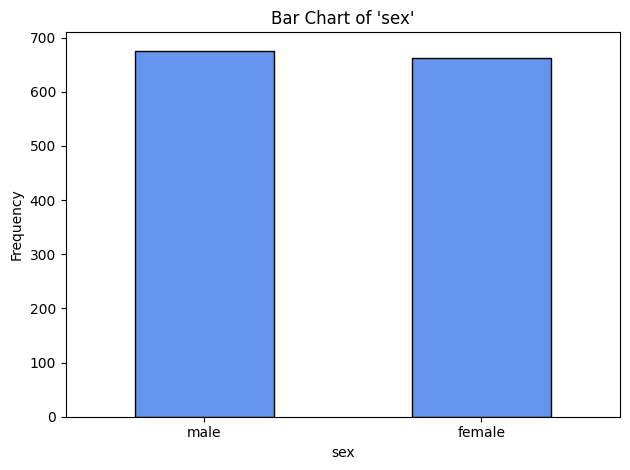

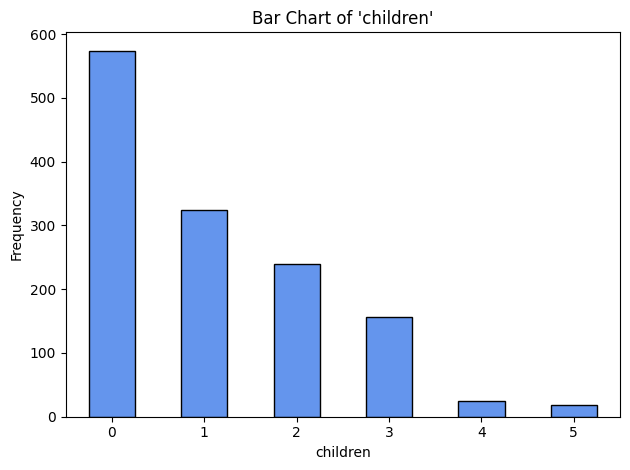

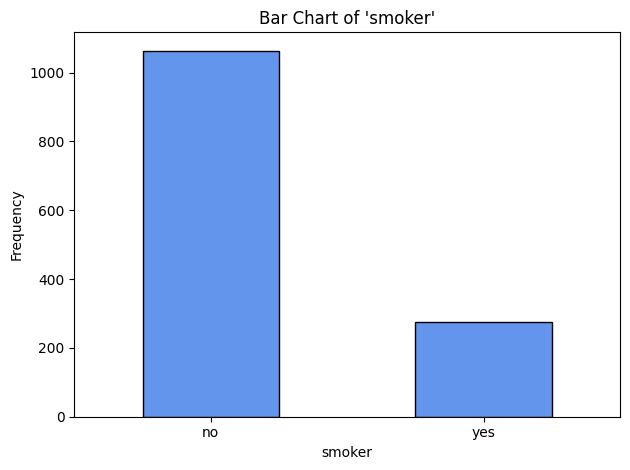

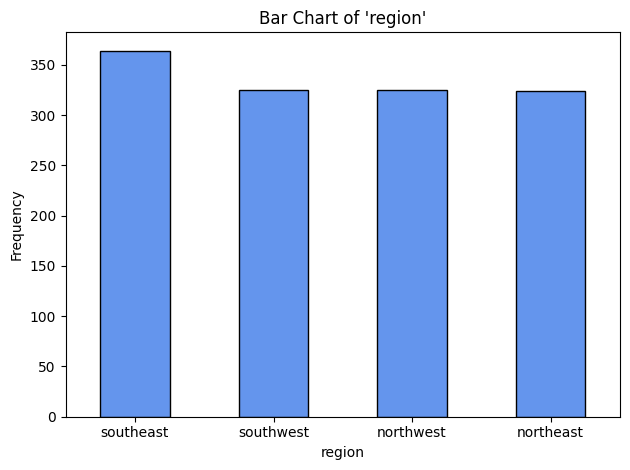

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


for col in df.columns:
    if df[col].dtype == 'object' or (pd.api.types.is_integer_dtype(df[col]) and df[col].nunique() < 10):
        counts = df[col].value_counts()

        plt.figure()
        counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
        plt.title(f"Bar Chart of '{col}'")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
